In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#import ptitprince
import seaborn as sns

In [19]:
fpath = '/home/hyruuk/GitHub/neuromod/shinobi_fmri/data/processed/ses-level_beta_maps_ICC.pkl'
with open(fpath, 'rb') as f:
    datadict = pickle.load(f)

condlist = np.unique(datadict['cond'])
subjlist = np.unique(datadict['subj'])
n_runs = len(datadict['fnames'])

corr_r2 = []
corr_cond = []
corr_intera = []

# Loop to get intra-subj R2
for cond in condlist:
    for subj in subjlist:
        for i in range(n_runs):
            for j in range(n_runs):
                if i<j:
                    if datadict['cond'][i] == cond and datadict['cond'][j] == cond:
                        if datadict['subj'][i] == subj and datadict['subj'][j] == subj:
                            corr_r2.append(datadict['corr_matrix'][i,j])
                            corr_cond.append(cond)
                            corr_intera.append('intra-subject')
                            

# Loop to get inter-subj R2
for cond in condlist:
    for subj in subjlist:
        for i in range(n_runs):
            for j in range(n_runs):
                if i<j:
                    if datadict['cond'][i] == cond and datadict['cond'][j] == cond:
                        if datadict['subj'][i] == subj and datadict['subj'][j] != subj:
                            corr_r2.append(datadict['corr_matrix'][i,j])
                            corr_cond.append(cond)
                            corr_intera.append('inter-subject')


# Loop to get intra-subj R2
for cond in condlist:
    for subj in subjlist:
        for i in range(n_runs):
            for j in range(n_runs):
                if i<j:
                    if datadict['cond'][i] == cond and datadict['cond'][j] != cond:
                        if datadict['subj'][i] == subj and datadict['subj'][j] == subj:
                            corr_r2.append(datadict['corr_matrix'][i,j])
                            corr_cond.append('Inter-annotations')
                            corr_intera.append('intra-subject')
                            

# Loop to get inter-subj R2
for cond in condlist:
    for subj in subjlist:
        for i in range(n_runs):
            for j in range(n_runs):
                if i<j:
                    if datadict['cond'][i] == cond and datadict['cond'][j] != cond:
                        if datadict['subj'][i] == subj and datadict['subj'][j] != subj:
                            corr_r2.append(datadict['corr_matrix'][i,j])
                            corr_cond.append('Inter-annotations')
                            corr_intera.append('inter-subject')

plot_df = pd.DataFrame({'r2':corr_r2,
                        'event': corr_cond,
                        'comparison': corr_intera})


In [17]:
df = plot_df.groupby(['comparison', 'event']).describe().reset_index()
df.sort_values(by=('r2', 'mean'), ascending=False, inplace=True)

# open table in a csv file
df.to_csv('/home/hyruuk/GitHub/neuromod/shinobi_fmri/reports/tables/ICC_table.csv')


In [11]:
df

comparison              event         r2                                \
                                          count      mean       std       min   
62  intra-subject         relational      407.0  0.646889  0.109803  0.314166   
56  intra-subject         math-story      440.0  0.576371  0.124291  0.108849   
73  intra-subject         story-math      440.0  0.576371  0.124291  0.108849   
54  intra-subject              match      407.0  0.566732  0.134772  0.009496   
39  intra-subject                HIT      242.0  0.556826  0.160094 -0.007406   
..            ...                ...        ...       ...       ...       ...   
13  inter-subject      left_foot-avg     1437.0  0.029741  0.085620 -0.295673   
25  inter-subject   relational-match     1304.0  0.027537  0.082974 -0.260392   
3   inter-subject  Inter-annotations  1677502.0  0.023203  0.097526 -0.453364   
27  inter-subject  reward-punishment     1393.0  0.010142  0.076922 -0.221420   
22  inter-subject  punishment-reward     1393.0  0.010142  0.076922 -0.221420   

                                            
         25%       50%       75%       max  
62  0.579890  0.665034  0.729696  0.843186  
56  0.493733  0.590264  0.663386  0.830152  
73  0.493733  0.590264  0.663386  0.830152  
54  0.503341  0.586579  0.662534  0.809038  
39  0.482023  0.575477  0.667400  0.814451  
..       ...       ...       ...       ...  
13 -0.027401  0.032563  0.090680  0.289432  
25 -0.023245  0.031636  0.080760  0.300717  
3  -0.037237  0.019827  0.080191  0.549921  
27 -0.044300  0.009471  0.061952  0.348667  
22 -0.044300  0.009471  0.061952  0.348667  

[76 rows x 10 columns]

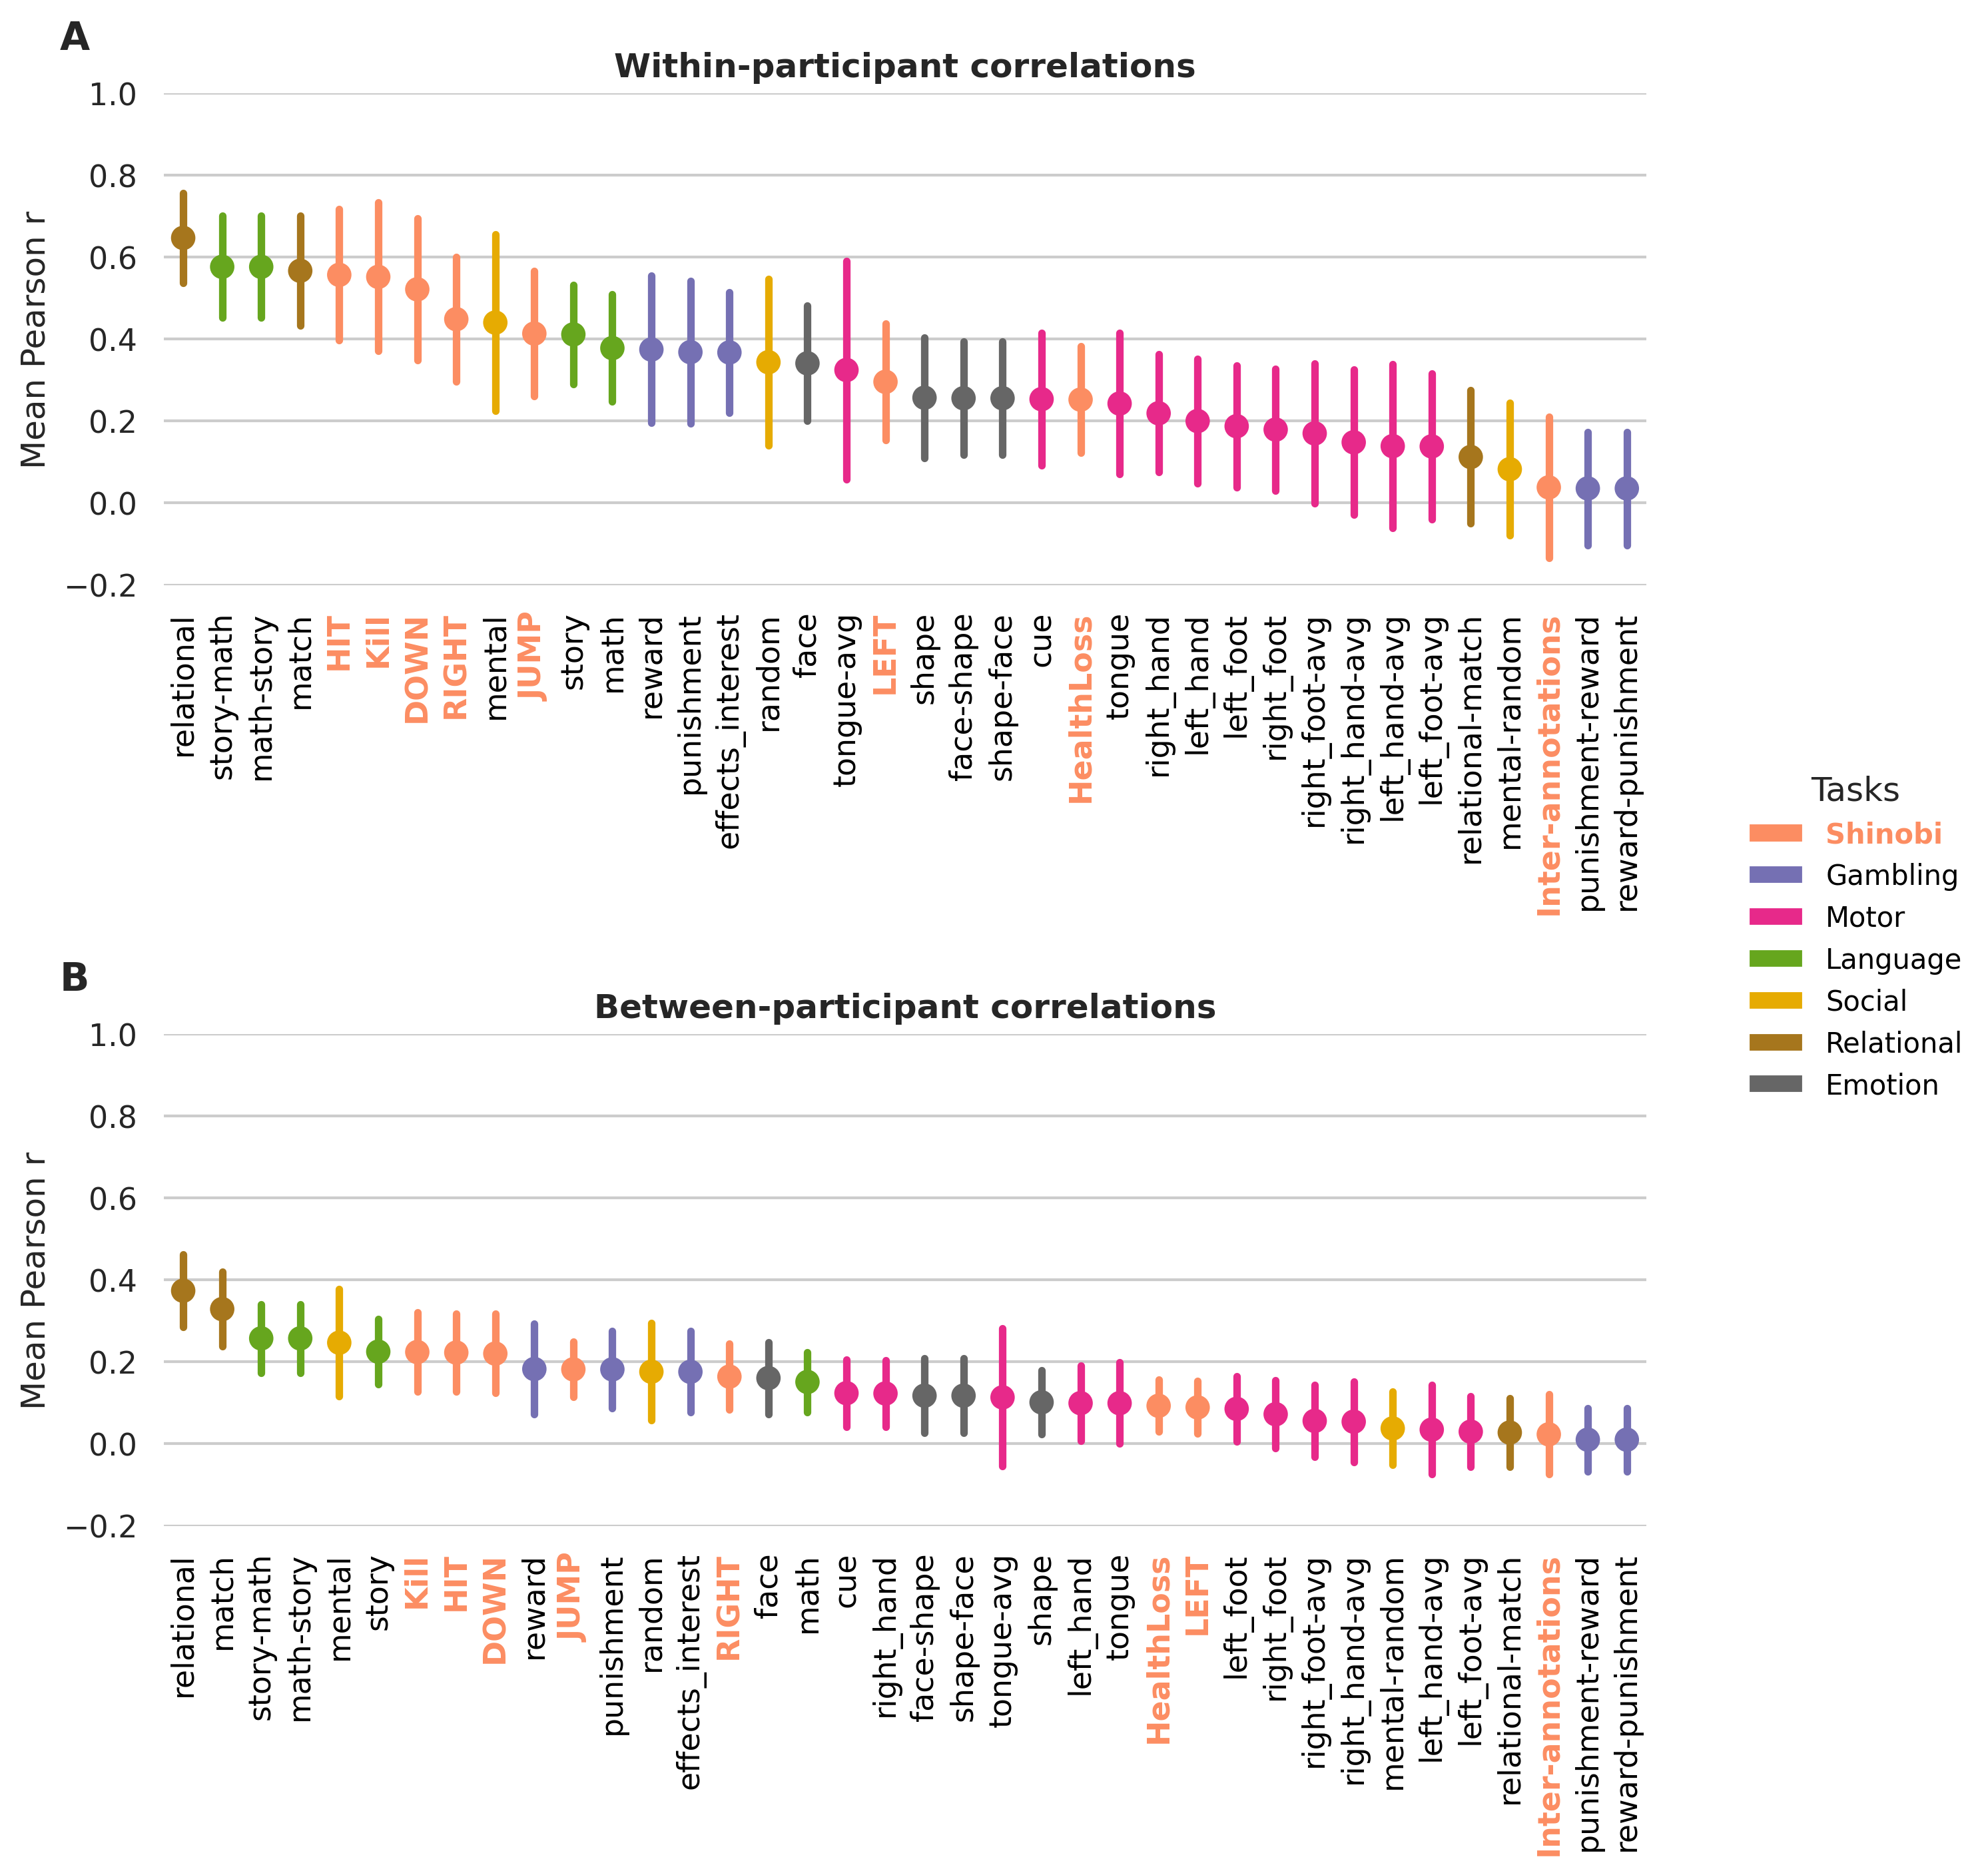

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from matplotlib.patches import Patch

# Ensure 'r2' is numeric and drop NaNs
plot_df['r2'] = pd.to_numeric(plot_df['r2'], errors='coerce')
plot_df = plot_df.dropna(subset=['r2'])

# Define events to highlight
highlight_events = ['Kill', 'HIT', 'JUMP', 'HealthLoss', 'DOWN', 'RIGHT', 'LEFT', 'Inter-annotations']

# Get colors from Seaborn's "Set2" palette
palette = sns.color_palette("Set2")
palette_dark = sns.color_palette("Dark2")
highlight_color = palette[1]  # Second color

# Define colors for each task
colors_dict = {
    'Gambling': palette_dark[2],
    'Motor': palette_dark[3],
    'Language': palette_dark[4],
    'Social': palette_dark[5],
    'Relational': palette_dark[6],
    'Emotion': palette_dark[7]
}

# Define events for each task
events_task_dict = {
    'Gambling': ['reward', 'punishment', 'reward-punishment', 'punishment-reward', 'effects_interest'],
    'Motor': ['left_hand', 'right_hand', 'left_foot', 
              'right_foot', 'tongue', 'cue', 'left_hand-avg', 
              'right_hand-avg', 'left_foot-avg', 'right_foot-avg', 
              'tongue-avg'],
    'Language': ['story', 'math', 'story-math', 'math-story'],
    'Social': ['mental', 'random', 'mental-random'],
    'Relational': ['relational', 'match', 'relational-match'],
    'Emotion': ['face', 'shape', 'face-shape', 'shape-face']
}

# Create a reverse mapping from event to task
event_to_task = {event: task for task, events in events_task_dict.items() for event in events}

# Function to create a palette dictionary
def create_palette(events):
    return {
        event: highlight_color if event in highlight_events else colors_dict.get(event_to_task.get(event, ''), '#333333')  # Default color if not found
        for event in events
    }

# Separate data into inter-subject and intra-subject
inter_df = plot_df[plot_df['comparison'] == 'inter-subject']
intra_df = plot_df[plot_df['comparison'] == 'intra-subject']

# Function to get sorted events based on mean 'r2'
def get_sorted_events(df):
    event_means = df.groupby('event')['r2'].mean().reset_index()
    sorted_events = event_means.sort_values('r2', ascending=False)['event'].tolist()
    return sorted_events

# Get sorted events and palettes
inter_events = get_sorted_events(inter_df)
intra_events = get_sorted_events(intra_df)
inter_palette = create_palette(inter_events)
intra_palette = create_palette(intra_events)

# Plot settings
sns.set(style="whitegrid", font_scale=1)

# Create subplots with a single column
fig, axes = plt.subplots(2, 1, figsize=(10, 8), dpi=300)

# Function to set x-tick labels with bold and highlight color for highlighted events
def set_xtick_labels(ax, highlight_events, highlight_color):
    labels = ax.get_xticklabels()
    for label in labels:
        event = label.get_text()
        if event in highlight_events:
            label.set_color(highlight_color)
            label.set_fontweight('bold')
        else:
            label.set_color('black')  # Default color for non-highlighted events

# Plot inter-subject data
sns.pointplot(
    data=inter_df,
    x='event',
    y='r2',
    palette=inter_palette,
    ax=axes[1],
    order=inter_events,
    ci='sd'
)
axes[1].set_title('Between-participant correlations', fontweight='bold')
axes[1].set_xlabel('')
axes[1].set_ylabel('Mean Pearson r')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)
axes[1].set_ylim(-0.2, 1)
set_xtick_labels(axes[1], highlight_events, highlight_color)

# Remove frame (spines) from the inter-subject plot
for spine in axes[1].spines.values():
    spine.set_visible(False)

# Plot intra-subject data
sns.pointplot(
    data=intra_df,
    x='event',
    y='r2',
    palette=intra_palette,
    ax=axes[0],
    order=intra_events,
    ci='sd'
)
axes[0].set_title('Within-participant correlations', fontweight='bold')
axes[0].set_xlabel('')
axes[0].set_ylabel('Mean Pearson r')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)
axes[0].set_ylim(-0.2, 1)
set_xtick_labels(axes[0], highlight_events, highlight_color)

# Remove frame (spines) from the intra-subject plot
for spine in axes[0].spines.values():
    spine.set_visible(False)

# --- Add bold "A" and "B" in the top-left of each subplot ---
axes[0].text(
    -0.05, 1.15, 'A', transform=axes[0].transAxes, 
    fontsize=14, fontweight='bold', va='top', ha='right'
)
axes[1].text(
    -0.05, 1.15, 'B', transform=axes[1].transAxes, 
    fontsize=14, fontweight='bold', va='top', ha='right'
)

# Create legend handles
# Place 'Shinobi' first
legend_elements = [Patch(facecolor=highlight_color, label='Shinobi')] + [
    Patch(facecolor=color, label=task) for task, color in colors_dict.items()
]

# Add the legend to the right of the plots
legend = fig.legend(handles=legend_elements, loc='center right', title='Tasks', frameon=False, fontsize='small')

# Customize legend text colors and styles
for text, patch in zip(legend.get_texts(), legend_elements):
    if patch.get_label() == 'Shinobi':
        text.set_color(patch.get_facecolor())
        text.set_fontweight('bold')
    else:
        text.set_color('black')  # Default color for other tasks

# Adjust layout to make room for the legend
plt.tight_layout(rect=[0, 0, 0.85, 1.2])  # Adjust right to 0.85 to leave space for the legend

# Display the plot
plt.show()


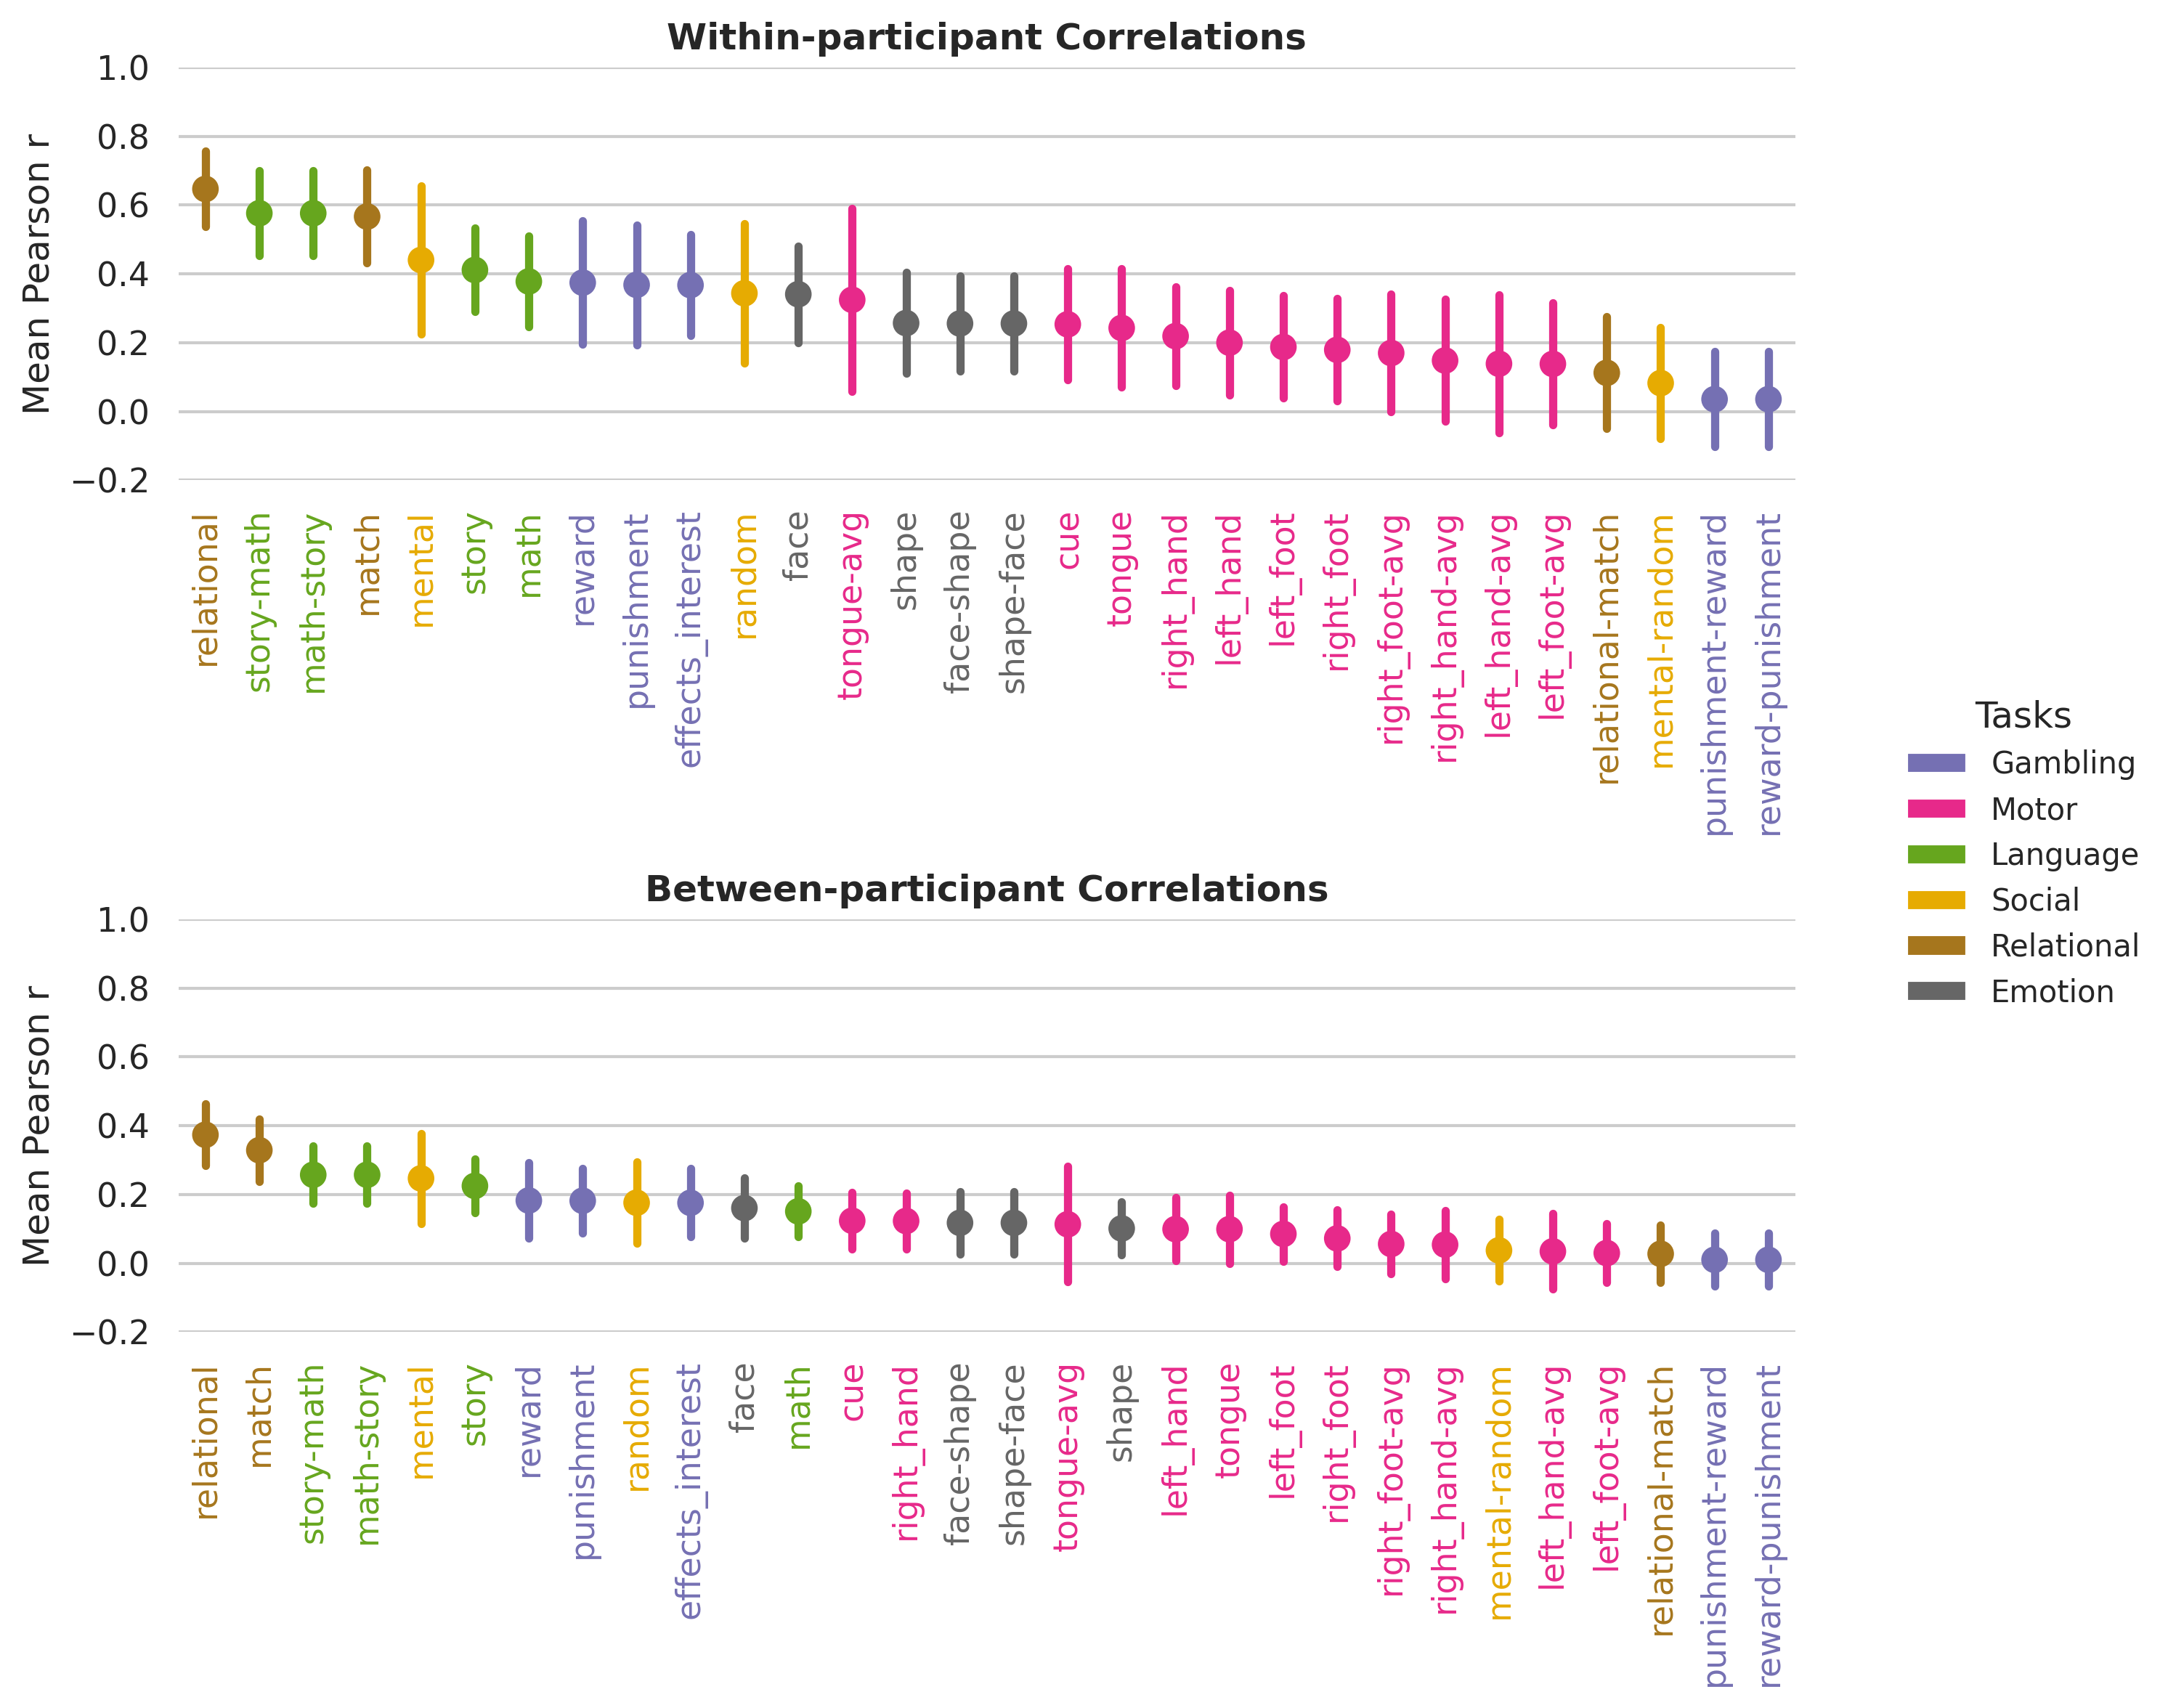

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from matplotlib.patches import Patch

# Ensure 'r2' is numeric and drop NaNs
plot_df['r2'] = pd.to_numeric(plot_df['r2'], errors='coerce')
plot_df = plot_df.dropna(subset=['r2'])
plot_df = plot_df[~plot_df['event'].isin(['DOWN', 'RIGHT', 'LEFT', 'JUMP', 'HealthLoss', 'Kill', 'Inter-annotations', 'HIT'])]

# Define events to highlight
highlight_events = ['Kill', 'HIT', 'JUMP', 'HealthLoss', 'DOWN', 'RIGHT', 'LEFT', 'Inter-annotations']

# Get colors from Seaborn's "Set2" palette
palette = sns.color_palette("Set2")
palette_dark = sns.color_palette("Dark2")
highlight_color = palette[1]  # Second color
# normal_color is no longer used since we'll map colors based on tasks
# normal_color = palette[0]     

# Define colors for each task
colors_dict = {
    'Gambling': palette_dark[2],
    'Motor': palette_dark[3],
    'Language': palette_dark[4],
    'Social': palette_dark[5],
    'Relational': palette_dark[6],
    'Emotion': palette_dark[7]
}

# Define events for each task
events_task_dict = {
    'Gambling': ['reward', 'punishment', 'reward-punishment', 'punishment-reward', 'effects_interest'],
    'Motor': ['left_hand', 'right_hand', 'left_foot', 
              'right_foot', 'tongue', 'cue', 'left_hand-avg', 
              'right_hand-avg', 'left_foot-avg', 'right_foot-avg', 
              'tongue-avg'],
    'Language': ['story', 'math', 'story-math', 'math-story'],
    'Social': ['mental', 'random', 'mental-random'],
    'Relational': ['relational', 'match', 'relational-match'],
    'Emotion': ['face', 'shape', 'face-shape', 'shape-face']
}

# Create a reverse mapping from event to task
event_to_task = {event: task for task, events in events_task_dict.items() for event in events}

# Function to create a palette dictionary
def create_palette(events):
    return {
        event: highlight_color if event in highlight_events else colors_dict.get(event_to_task.get(event, ''), '#333333')  # Default color if not found
        for event in events
    }

# Separate data into inter-subject and intra-subject
inter_df = plot_df[plot_df['comparison'] == 'inter-subject']
intra_df = plot_df[plot_df['comparison'] == 'intra-subject']

# Function to get sorted events based on mean 'r2'
def get_sorted_events(df):
    event_means = df.groupby('event')['r2'].mean().reset_index()
    sorted_events = event_means.sort_values('r2', ascending=False)['event'].tolist()
    return sorted_events

# Get sorted events and palettes
inter_events = get_sorted_events(inter_df)
intra_events = get_sorted_events(intra_df)
inter_palette = create_palette(inter_events)
intra_palette = create_palette(intra_events)

# Plot settings
sns.set(style="whitegrid", font_scale=1)

# Create subplots with a single column
fig, axes = plt.subplots(2, 1, figsize=(10, 8), dpi=300)

# Function to set x-tick labels with bold and highlight color for highlighted events
def set_xtick_labels(ax, highlight_events, colors_dict, event_to_task_dict):
    labels = ax.get_xticklabels()
    for label in labels:
        event = label.get_text()
        if event in highlight_events:
            label.set_color(highlight_color)
            label.set_fontweight('bold')
        else:
            task = event_to_task_dict.get(event, None)
            if task:
                label.set_color(colors_dict.get(task, '#333333'))
            else:
                label.set_color('#333333')  # Default color if task not found

# Plot inter-subject data
sns.pointplot(
    data=inter_df,
    x='event',
    y='r2',
    palette=inter_palette,
    ax=axes[1],
    order=inter_events,
    ci='sd'
)
axes[1].set_title('Between-participant Correlations', fontweight='bold')
axes[1].set_xlabel('')
axes[1].set_ylabel('Mean Pearson r')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)
axes[1].set_ylim(-0.2, 1)
set_xtick_labels(axes[1], highlight_events, colors_dict, event_to_task)

# Remove frame (spines) from the inter-subject plot
for spine in axes[1].spines.values():
    spine.set_visible(False)

# Plot intra-subject data
sns.pointplot(
    data=intra_df,
    x='event',
    y='r2',
    palette=intra_palette,
    ax=axes[0],
    order=intra_events,
    ci='sd'
)
axes[0].set_title('Within-participant Correlations', fontweight='bold')
axes[0].set_xlabel('')
axes[0].set_ylabel('Mean Pearson r')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)
axes[0].set_ylim(-0.2, 1)
set_xtick_labels(axes[0], highlight_events, colors_dict, event_to_task)

# Remove frame (spines) from the intra-subject plot
for spine in axes[0].spines.values():
    spine.set_visible(False)

# Create legend handles
legend_elements = [Patch(facecolor=color, label=task) for task, color in colors_dict.items()]
#legend_elements.append(Patch(facecolor=highlight_color, label='Shinobi'))  # Assuming 'Shinobi' represents highlighted events

# Add the legend to the right of the plots
# Position the legend outside the main plot area
fig.legend(handles=legend_elements, loc='center right', title='Tasks', frameon=False, fontsize='small')

# Adjust layout to make room for the legend
plt.tight_layout(rect=[0, 0, 0.85, 1])  # Adjust right to 0.85 to leave space for the legend

# Display the plot
plt.show()

In [6]:
# remove event : 'DOWN', 'RIGHT', 'LEFT', 'JUMP', 'HealthLoss', 'Kill', 'Inter-annotations', 'HIT'


0                       DOWN
1                       DOWN
2                       DOWN
3                       DOWN
4                       DOWN
                 ...        
2301580    Inter-annotations
2301581    Inter-annotations
2301582    Inter-annotations
2301583    Inter-annotations
2301584    Inter-annotations
Name: event, Length: 2301585, dtype: object

[(('HIT', 'inter-subject'), ('HIT', 'intra-subject')), (('HealthLoss', 'inter-subject'), ('HealthLoss', 'intra-subject')), (('JUMP', 'inter-subject'), ('JUMP', 'intra-subject')), (('Kill', 'inter-subject'), ('Kill', 'intra-subject'))]
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

HIT_intra-subject vs. HIT_inter-subject: t-test independent samples with Benjamini-Hochberg correction, P_val:3.265e-148 t=3.104e+01
JUMP_intra-subject vs. JUMP_inter-subject: t-test independent samples with Benjamini-Hochberg correction, P_val:1.599e-125 t=2.771e+01
Kill_intra-subject vs. Kill_inter-subject: t-test independent samples with Benjamini-Hochberg correction, P_val:1.865e-135 t=2.917e+01
HealthLoss_intra-subject vs. HealthLoss_inter-subject: t-test independent samples with Benjamini-Hochberg correction, P_val:7.444e-69 t=1.915e+01


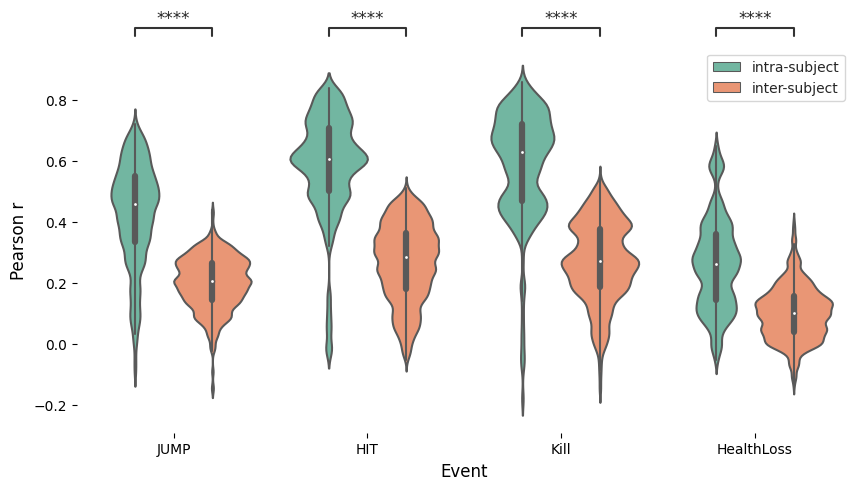

In [3]:
from statannotations.Annotator import Annotator
import scipy

dx="event"; dy="r2"; dhue = "comparison"; ort="v"; pal = "Set2"; sigma = .15
order = ['JUMP', 'HIT', 'Kill', 'HealthLoss']
f, ax = plt.subplots(figsize=(10,5))
sns.set(font_scale = 2)
sns.set_theme(style="whitegrid")
sns.violinplot(x = dx, y = dy, hue = dhue, 
               order=order,
               data = plot_df, palette = pal, bw = sigma,
               ax = ax, orient = ort, alpha = .65, vmax=1)

#ax.set_title('Correlations between beta maps', fontsize=14)
ax.set_xlabel('Event', fontsize=12)
ax.set_ylabel('Pearson r', fontsize=12)
ax.tick_params(axis = 'both', which = 'major', labelsize = 10)
plt.legend(loc='best')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:5], labels[:5], fontsize=10)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)



# Build the pairs
pairs = []
#pairs.append(('intra-subject','inter-subject'))
#for comp in np.unique(plot_df.comparison):
for event in np.unique(plot_df.event):
    if event != 'Inter-annotations':
        pairs.append(((event, 'inter-subject'), (event, 'intra-subject')))
        #for ev in order:
            #for comp in np.unique(plot_df.comparison):
                #pairs.append(((event, comp), (ev, comp)))
print(pairs)
annotator = Annotator(ax, pairs, data=plot_df, x=dx, y=dy, hue=dhue, order=order)
#ttest_ind = scipy.stats.ttest_ind()
annotator.configure(test='t-test_ind', text_format='star', loc='outside', comparisons_correction='fdr_bh')
annotator.apply_and_annotate();


In [4]:
plot_df_intra = plot_df[plot_df.comparison == 'intra-subject']
plot_df_inter = plot_df[plot_df.comparison == 'inter-subject']

,r2,event,comparison
0,0.661470,HIT,intra-subject
1,-0.004476,HIT,intra-subject
2,0.735708,HIT,intra-subject
3,0.414770,HIT,intra-subject
4,0.639137,HIT,intra-subject
...,...,...,...
15748,0.092798,Inter-annotations,inter-subject
15749,0.137961,Inter-annotations,inter-subject
15750,-0.000654,Inter-annotations,inter-subject
15751,0.192476,Inter-annotations,inter-subject


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/home/hyruuk/mambaforge/envs/shinobi/lib/python3.7/site-packages/statannotations/_Plotter.py:338: UserWarning: Invalid x-position found. Are the same parameters passed to seaborn and statannotations calls? or are there few data points?
  "Invalid x-position found. Are the same parameters passed "
/home/hyruuk/mambaforge/envs/shinobi/lib/python3.7/site-packages/statannotations/_Plotter.py:338: UserWarning: Invalid x-position found. Are the same parameters passed to seaborn and statannotations calls? or are there few data points?
  "Invalid x-position found. Are the same parameters passed "
/home/hyruuk/mambaforge/envs/shinobi/lib/python3.7/site-packages/statannotations/_Plotter.py:338: UserWarning: Invalid x-position found. Are the same parameters passed to seaborn and statannotations calls? or are there few data points?
  "Invalid 

[(('HIT', 'inter-subject'), ('HIT', 'intra-subject')), (('HealthLoss', 'inter-subject'), ('HealthLoss', 'intra-subject')), (('JUMP', 'inter-subject'), ('JUMP', 'intra-subject')), (('Kill', 'inter-subject'), ('Kill', 'intra-subject'))]
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

HIT_intra-subject vs. HIT_inter-subject: t-test independent samples with Benjamini-Hochberg correction, P_val:3.265e-148 t=3.104e+01
JUMP_intra-subject vs. JUMP_inter-subject: t-test independent samples with Benjamini-Hochberg correction, P_val:1.599e-125 t=2.771e+01
Kill_intra-subject vs. Kill_inter-subject: t-test independent samples with Benjamini-Hochberg correction, P_val:1.865e-135 t=2.917e+01
HealthLoss_intra-subject vs. HealthLoss_inter-subject: t-test independent samples with Benjamini-Hochberg correction, P_val:7.444e-69 t=1.915e+01


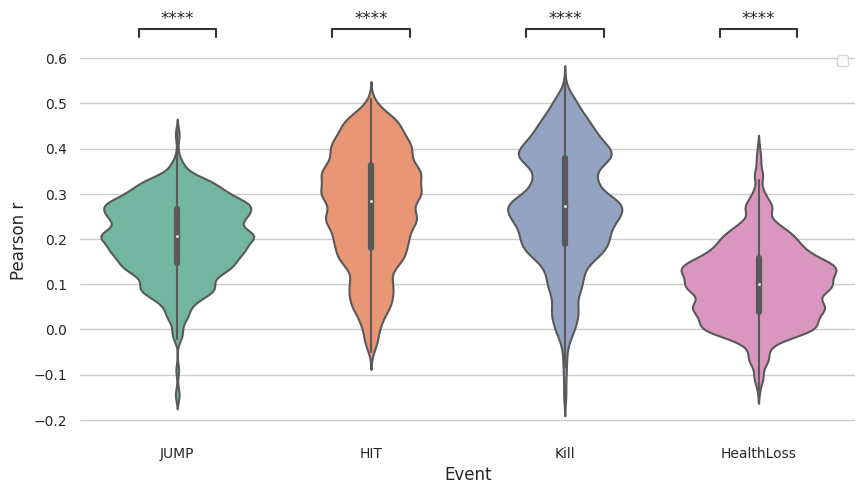

In [7]:
### Split version
## Inter

from statannotations.Annotator import Annotator
import scipy


dx="event"; dy="r2"; dhue = "comparison"; ort="v"; pal = "Set2"; sigma = .15
order = ['JUMP', 'HIT', 'Kill', 'HealthLoss']
f, ax = plt.subplots(figsize=(10,5))
sns.set(font_scale = 2)
sns.set_theme(style="whitegrid")
sns.violinplot(x = dx, y = dy, 
               order=order,
               data = plot_df_inter, palette = pal, bw = sigma,
               ax = ax, orient = ort, alpha = .65, vmax=1)

#ax.set_title('Correlations between beta maps', fontsize=14)
ax.set_xlabel('Event', fontsize=12)
ax.set_ylabel('Pearson r', fontsize=12)
ax.tick_params(axis = 'both', which = 'major', labelsize = 10)
plt.legend(loc='best')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:5], labels[:5], fontsize=10)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)



# Build the pairs
pairs = []
#pairs.append(('intra-subject','inter-subject'))
#for comp in np.unique(plot_df.comparison):
for event in np.unique(plot_df.event):
    if event != 'Inter-annotations':
        pairs.append(((event, 'inter-subject'), (event, 'intra-subject')))
        #for ev in order:
            #for comp in np.unique(plot_df.comparison):
                #pairs.append(((event, comp), (ev, comp)))
print(pairs)
annotator = Annotator(ax, pairs, data=plot_df, x=dx, y=dy, hue=dhue, order=order)
#ttest_ind = scipy.stats.ttest_ind()
annotator.configure(test='t-test_ind', text_format='star', loc='outside', comparisons_correction='fdr_bh')
annotator.apply_and_annotate();


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/home/hyruuk/mambaforge/envs/shinobi/lib/python3.7/site-packages/statannotations/_Plotter.py:338: UserWarning: Invalid x-position found. Are the same parameters passed to seaborn and statannotations calls? or are there few data points?
  "Invalid x-position found. Are the same parameters passed "
/home/hyruuk/mambaforge/envs/shinobi/lib/python3.7/site-packages/statannotations/_Plotter.py:338: UserWarning: Invalid x-position found. Are the same parameters passed to seaborn and statannotations calls? or are there few data points?
  "Invalid x-position found. Are the same parameters passed "
/home/hyruuk/mambaforge/envs/shinobi/lib/python3.7/site-packages/statannotations/_Plotter.py:338: UserWarning: Invalid x-position found. Are the same parameters passed to seaborn and statannotations calls? or are there few data points?
  "Invalid 

[(('HIT', 'inter-subject'), ('HIT', 'intra-subject')), (('HealthLoss', 'inter-subject'), ('HealthLoss', 'intra-subject')), (('JUMP', 'inter-subject'), ('JUMP', 'intra-subject')), (('Kill', 'inter-subject'), ('Kill', 'intra-subject'))]
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

HIT_intra-subject vs. HIT_inter-subject: t-test independent samples with Benjamini-Hochberg correction, P_val:3.265e-148 t=3.104e+01
JUMP_intra-subject vs. JUMP_inter-subject: t-test independent samples with Benjamini-Hochberg correction, P_val:1.599e-125 t=2.771e+01
Kill_intra-subject vs. Kill_inter-subject: t-test independent samples with Benjamini-Hochberg correction, P_val:1.865e-135 t=2.917e+01
HealthLoss_intra-subject vs. HealthLoss_inter-subject: t-test independent samples with Benjamini-Hochberg correction, P_val:7.444e-69 t=1.915e+01


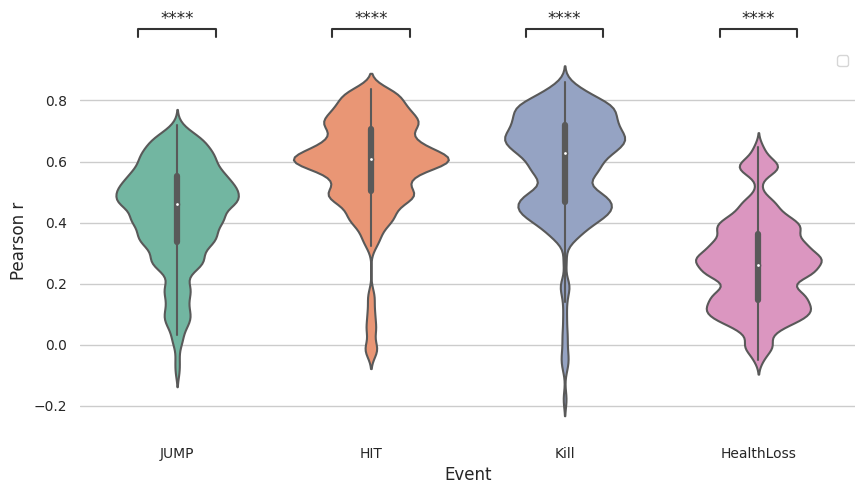

In [8]:
### Split version
## Intra

from statannotations.Annotator import Annotator
import scipy


dx="event"; dy="r2"; dhue = "comparison"; ort="v"; pal = "Set2"; sigma = .15
order = ['JUMP', 'HIT', 'Kill', 'HealthLoss']
f, ax = plt.subplots(figsize=(10,5))
sns.set(font_scale = 2)
sns.set_theme(style="whitegrid")
sns.violinplot(x = dx, y = dy, 
               order=order,
               data = plot_df_intra, palette = pal, bw = sigma,
               ax = ax, orient = ort, alpha = .65, vmax=1)

#ax.set_title('Correlations between beta maps', fontsize=14)
ax.set_xlabel('Event', fontsize=12)
ax.set_ylabel('Pearson r', fontsize=12)
ax.tick_params(axis = 'both', which = 'major', labelsize = 10)
plt.legend(loc='best')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:5], labels[:5], fontsize=10)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)



# Build the pairs
pairs = []
#pairs.append(('intra-subject','inter-subject'))
#for comp in np.unique(plot_df.comparison):
for event in np.unique(plot_df.event):
    if event != 'Inter-annotations':
        pairs.append(((event, 'inter-subject'), (event, 'intra-subject')))
        #for ev in order:
            #for comp in np.unique(plot_df.comparison):
                #pairs.append(((event, comp), (ev, comp)))
print(pairs)
annotator = Annotator(ax, pairs, data=plot_df, x=dx, y=dy, hue=dhue, order=order)
#ttest_ind = scipy.stats.ttest_ind()
annotator.configure(test='t-test_ind', text_format='star', loc='outside', comparisons_correction='fdr_bh')
annotator.apply_and_annotate();


Text(0, 0.5, 'Pearson r')

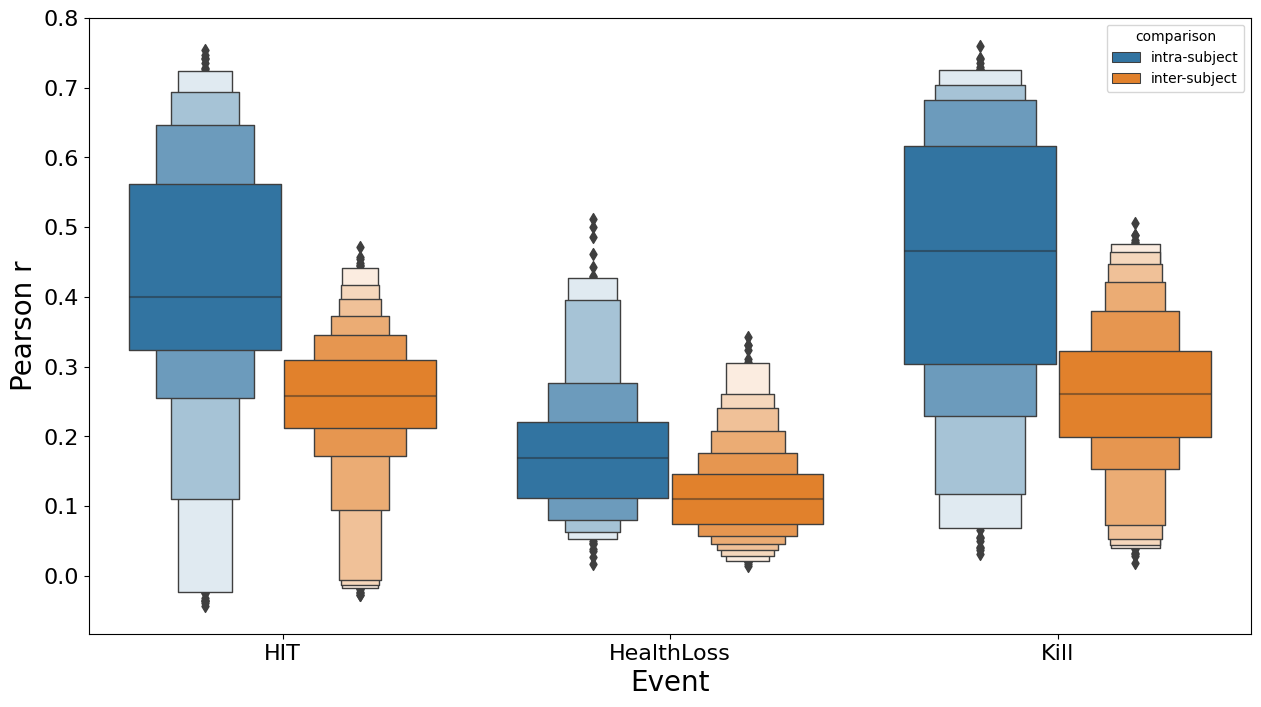

In [9]:
import seaborn as sbn
fig, ax = plt.subplots(figsize=(15,8))
sbn.boxenplot(data=plot_df, x='event', y='r2', hue='comparison', scale='area')
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
ax.set_xlabel('Event', fontsize=20)
ax.set_ylabel('Pearson r', fontsize=20)

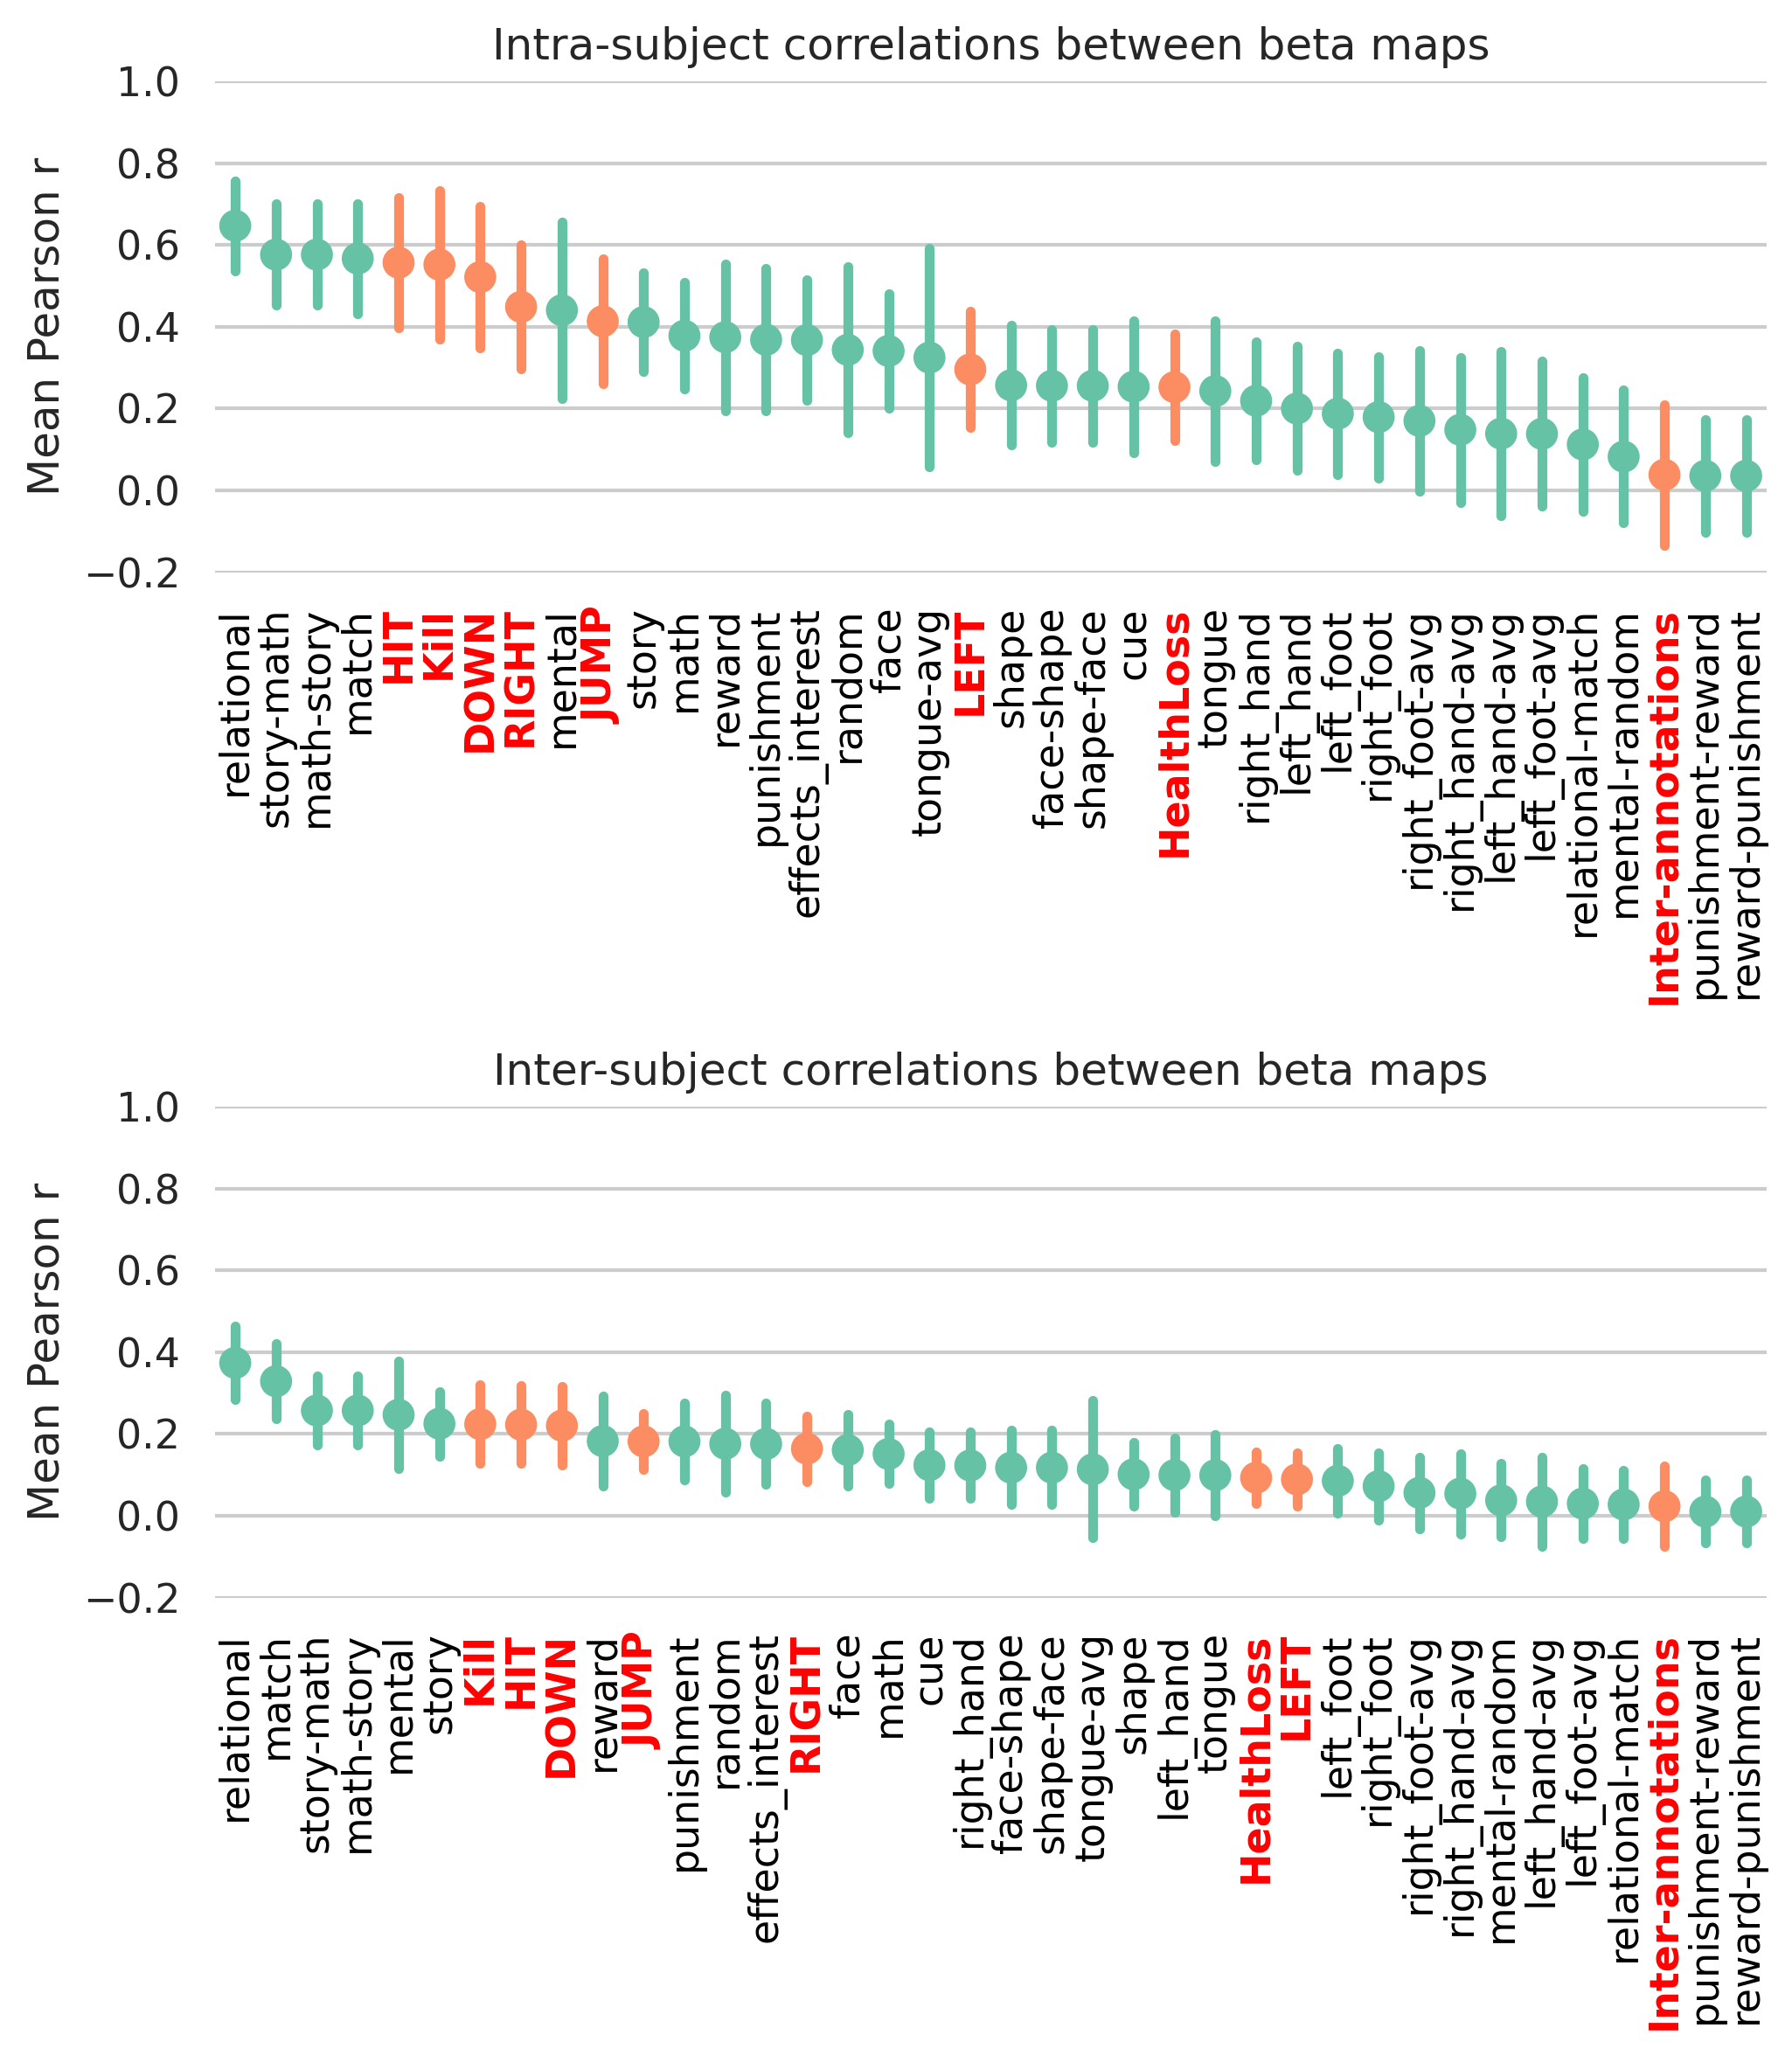